In [1]:
!pip uninstall slearn -y

In [1]:
# !pip uninstall slearn -y
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import slearn

### sine data 

In [2]:
ts = np.array([np.sin(0.05*i) for i in range(2000)])  # original time series
train = ts[:round(0.5*len(ts))]
test = ts[round(0.5*len(ts)):]

In [3]:
sl = slearn.slearn(ws=10, step=50, method='SAX', classifier_name="GaussianNB")
sl.set_symbols(series=train, width=5) # symbolic representaion parameters, you will need to change it if you use SAX)
sklearn_params = {'var_smoothing':0.001} # sklearn parameters, setting any you want
abba_nb_pred = sl.predict(**sklearn_params)

-------- Config --------
The length of time series:  1000
The number of symbols:  200
The dimension of features is:  10
The number of symbols to be predicted:  50
The parameters of classifiers:  {'var_smoothing': 0.001}


In [4]:
sl = slearn.slearn(method='fABBA', ws=3, step=50, form='numeric', classifier_name="MLPClassifier")

sl.set_symbols(series=train, tol=0.01, alpha=0.3) # symbolic representaion parameters, you will need to change it if you use SAX)
sklearn_params = {'hidden_layer_sizes':(20,80), 'learning_rate_init':0.1}
abba_nn_pred = sl.predict(**sklearn_params)

Compression: Reduced series of length 1000 to 36 segments. Digitization: Reduced 36 pieces to 7 symbols.
-------- Config --------
The length of time series:  1000
The number of symbols:  36
The dimension of features is:  3
The number of symbols to be predicted:  50
The parameters of classifiers:  {'hidden_layer_sizes': (20, 80), 'learning_rate_init': 0.1}


or you can try another way for parameters assignment.

In [5]:
sl = slearn.slearn(method='SAX', ws=5, step=1000, classifier_name="GaussianNB")
sl.set_symbols(series=train, width=20) 
abba_nb_pred = sl.predict()

-------- Config --------
The length of time series:  1000
The number of symbols:  50
The dimension of features is:  5
The number of symbols to be predicted:  1000
The parameters of classifiers:  {}


In [6]:
sl = slearn.slearn(method='fABBA', ws=3, step=1000, classifier_name="MLPClassifier")
sl.set_symbols(series=train, tol=0.01, alpha=0.3) # symbolic representaion parameters, you will need to change it if you use SAX)
abba_nn_pred = sl.predict(hidden_layer_sizes=(20,80), learning_rate_init=0.1)

Compression: Reduced series of length 1000 to 36 segments. Digitization: Reduced 36 pieces to 7 symbols.
-------- Config --------
The length of time series:  1000
The number of symbols:  36
The dimension of features is:  3
The number of symbols to be predicted:  1000
The parameters of classifiers:  {'hidden_layer_sizes': (20, 80), 'learning_rate_init': 0.1}


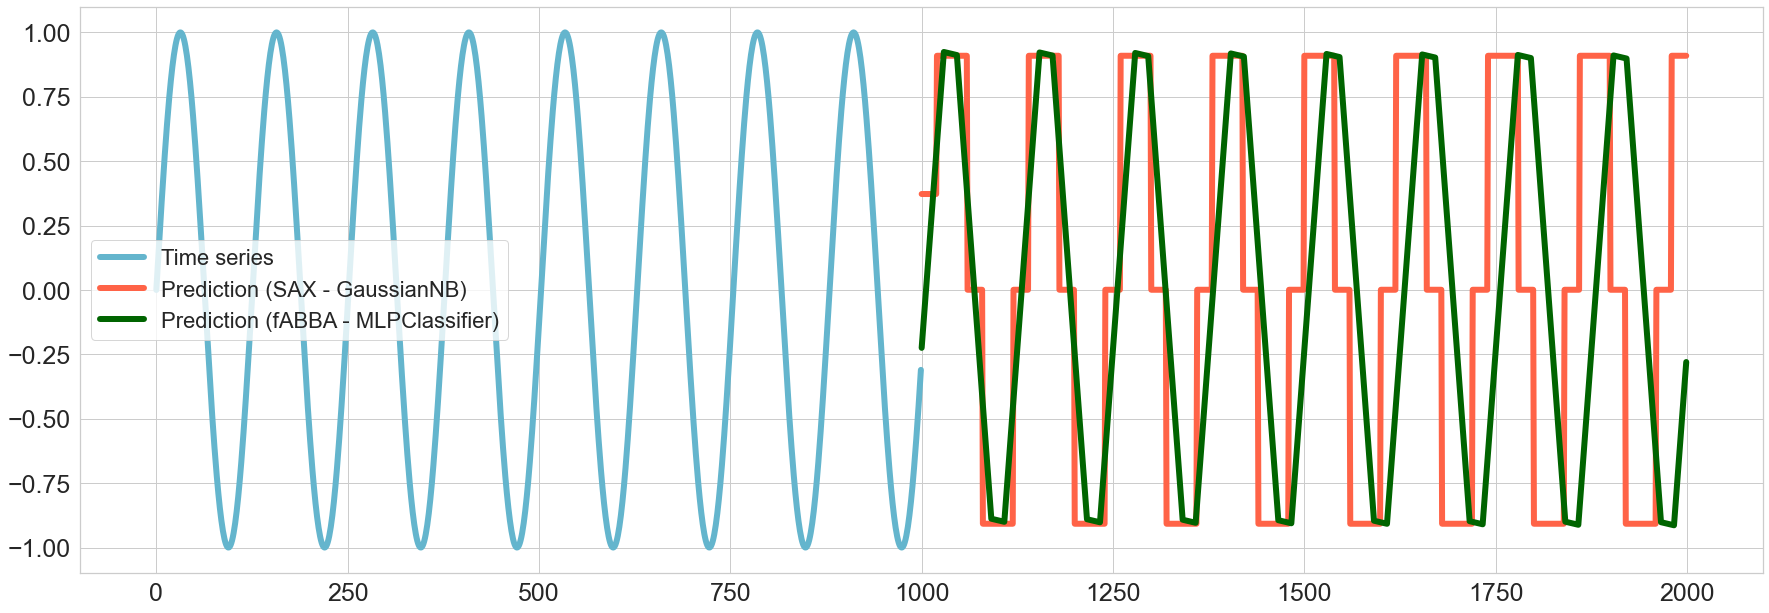

In [7]:
min_len = len(test)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 9))
sns.set(font_scale=2, style="whitegrid")
sns.lineplot(x=np.arange(0, len(train)), y=train, color='c', linewidth=6, label='Time series')
sns.lineplot(x=np.arange(len(train), len(train)+min_len), y=abba_nb_pred[:min_len], color='tomato', linewidth=6, label='Prediction (SAX - GaussianNB)')
sns.lineplot(x=np.arange(len(train), len(train)+min_len), y=abba_nn_pred[:min_len], color='darkgreen', linewidth=6, label='Prediction (fABBA - MLPClassifier)')
plt.tight_layout()
plt.tick_params(axis='both', labelsize=25)
plt.show()

In [8]:
#Sequence MarkovChain generate
string_gen1 = slearn.markovChain_gererate(n =2, current_state = 'A', no = 1000, verbose=1)
#Sequence randomgenerate
string_gen2 = slearn.random_generate(start='A', num = 10, power = 2, length = 1000, verbose=1)

generate: BBAAABBBBBABABABBAABABABBBBBAABABBAAAABABAAABAAAAABAAABABABABBBAAAAAAAABBAAABBABABAABABABABBABBBABABBABABBBBBBBBABAABABAAABBBBBABAABBBABBBABABABBBAABABBBBAABAAAAABAABBAABBABBBBBAAAABBBAAAAABAAAABAABBABAABAABBBBABABBABBAAAAAAAAABBAAABABAAAABBBBABBBAAAABBBABAABBABABBBBBABBAAABAABAABAAAABBBBBAAAAAABABAAABAABBBAAAAAABBAAABABBBAABAAAAABAAABBBAAAABAAABABBABABABBBABBAABBABBABBBBBABAAAABABAAAAABABBAAABAAAAAAAAAABBBAABBBABAABABBABABAABBAAABBBBABAABABABBAAABAAAABAABBBBBBBBAAAAAABABBBABBABAAAAAAAABABBAAAAABBBBAABBBAABAAABAAAABAAABBBBABBBBABBBABAAABAAABBBABBBBBBBBBAAABAABABABAABAAAABBBBBABAAABAABABAAAAAAABAAABBABABBBBBBBAAAAAABBAABBBBBAAABBBAABAABAAAABABAAAABABBAABABBBBAAAAABABBBBABAAAAAAAABAAAAAAAAABABBAAAAAABBBABABBBBAAAAAABAAAAABAABABBBBABBBABAAAABAAABBBABBBAAABAAABBAABBAAAAAABABABBAAAAABAABBBABBABABAAAABBBAAAABABBABABBBABAABAAABABBAAABBABBBAAAABBAABBAABBBAAAAAAABBBABBBABBABAAABBBBBAABAAABBAAAABABABBAABABBBBBBBABABAAAABAAABAAABAABABBABAAAAAABBABAAAAABABBABBBAAAABBBBBBBBBABAAAABAABABBA

In [9]:
string_gen1

'BBAAABBBBBABABABBAABABABBBBBAABABBAAAABABAAABAAAAABAAABABABABBBAAAAAAAABBAAABBABABAABABABABBABBBABABBABABBBBBBBBABAABABAAABBBBBABAABBBABBBABABABBBAABABBBBAABAAAAABAABBAABBABBBBBAAAABBBAAAAABAAAABAABBABAABAABBBBABABBABBAAAAAAAAABBAAABABAAAABBBBABBBAAAABBBABAABBABABBBBBABBAAABAABAABAAAABBBBBAAAAAABABAAABAABBBAAAAAABBAAABABBBAABAAAAABAAABBBAAAABAAABABBABABABBBABBAABBABBABBBBBABAAAABABAAAAABABBAAABAAAAAAAAAABBBAABBBABAABABBABABAABBAAABBBBABAABABABBAAABAAAABAABBBBBBBBAAAAAABABBBABBABAAAAAAAABABBAAAAABBBBAABBBAABAAABAAAABAAABBBBABBBBABBBABAAABAAABBBABBBBBBBBBAAABAABABABAABAAAABBBBBABAAABAABABAAAAAAABAAABBABABBBBBBBAAAAAABBAABBBBBAAABBBAABAABAAAABABAAAABABBAABABBBBAAAAABABBBBABAAAAAAAABAAAAAAAAABABBAAAAAABBBABABBBBAAAAAABAAAAABAABABBBBABBBABAAAABAAABBBABBBAAABAAABBAABBAAAAAABABABBAAAAABAABBBABBABABAAAABBBAAAABABBABABBBABAABAAABABBAAABBABBBAAAABBAABBAABBBAAAAAAABBBABBBABBABAAABBBBBAABAAABBAAAABABABBAABABBBBBBBABABAAAABAAABAAABAABABBABAAAAAABBABAAAAABABBABBBAAAABBBBBBBBBABAAAABAABABBAABABBAABB